# 第9章 教師なし学習

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn #正規乱数

## 9.1 K-meansクラスタリング

In [4]:
def k_means(X,K,iteration=20):
    n,p=X.shape
    center=np.zeros((K,p))
    y=np.random.choice(K,n,replace=True)
    scores=[]
    for h in range(iteration):
        for k in range(K):
            if np.sum(y==k)==0:
                center[k,0]=np.inf
            else:
                for j in range(p):
                    center[k,j]=np.mean(X[y==k,j])
        S_total=0
        for i in range(n):
            S_min=np.inf
            for k in range(K):
                S=np.sum((X[i,]-center[k,])**2)
                if S<S_min:
                    S_min=S
                    y[i]=k
            S_total+=S_min
        scores.append(S_total)
    return {'clusters':y, 'scores':scores}

In [5]:
n=1000;K=5;p=2
X=randn(n,p)  #データ生成

Text(0, 0.5, '第2成分')

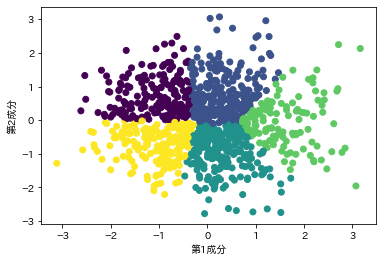

In [6]:
y=k_means(X,5)['clusters'] #各サンプルのクラスタを得る
#クラスタごとに色を変えて,点を書く
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("第1成分")
plt.ylabel("第2成分")

([<matplotlib.axis.XTick at 0x18cf2148828>,
 <a list of 20 Text xticklabel objects>)

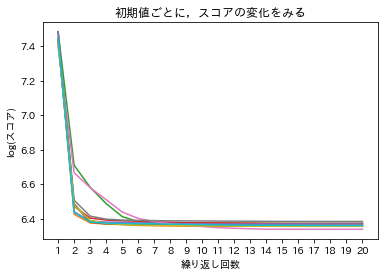

In [7]:
n=1000;p=2
X=randn(n,p)
itr=np.arange(1,21,1)
for r in range(10):
    scores=k_means(X,5)['scores']
    plt.plot(itr,np.log(scores))
plt.xlabel("繰り返し回数")
plt.ylabel("log(スコア)")
plt.title("初期値ごとに，スコアの変化をみる")
plt.xticks(np.arange(1,21,1))

## 9.2 階層的クラスタリング

In [118]:
def dist_complete(x,y):
    r=x.shape[0]
    s=y.shape[0]
    dist_max=0
    for i in range(r):
        for j in range(s):
            d=np.linalg.norm(x[i,]-y[j,])
            if d>dist_max:
                dist_max=d
    return dist_max

In [119]:
def dist_single(x,y):
    r=x.shape[0]
    s=y.shape[0]
    dist_min=np.inf
    for i in range(r):
        for j in range(s):
            d=np.linalg.norm(x[i,]-y[j,])
            if d<dist_min:
                dist_min=d
    return dist_min

In [130]:
def dist_centroid(x,y):
    r=x.shape[0]
    s=y.shape[0]
    x_bar=0
    for i in range(r):
        x_bar=x_bar+x[i,]
    x_bar=x_bar/r
    y_bar=0
    for i in range(s):
        y_bar=y_bar+y[i,]
    y_bar=y_bar/s
    return (np.linalg.norm(x_bar-y_bar))

In [131]:
def dist_average(x,y):
    r=x.shape[0]
    s=y.shape[0]
    S=0
    for i in range(r):
        for j in range(s):
            S=S+np.linalg.norm(x[i,]-y[j,])
    return(S/r/s)

In [12]:
import copy

In [121]:
def hc(X,dd="complete"):
    n=X.shape[0]
    index=[[i] for i in range(n)]
    cluster=[[] for i in range(n-1)]
    for k in range(n,1,-1):
        #index_2=[]
        dist_min=np.inf
        for i in range(k-1):
            for j in range(i+1,k):
                i_0=index[i];j_0=index[j]
                if dd == "complete":
                    d=dist_complete(X[i_0,],X[j_0,])
                elif dd == "single":
                    d=dist_single(X[i_0,],X[j_0,])
                elif dd == "centroid":
                    d=dist_centroid(X[i_0,],X[j_0,])
                elif dd == "average":
                    d=dist_average(X[i_0,],X[j_0,])
                if d<dist_min:
                    dist_min=d
                    i_1=i    #結合される側のlistのindex
                    j_1=j    #新たに結合するlistのindex
        index[i_1].extend(index[j_1])  #追加する
        if j_1 < k:               #追加したindexの後ろを1つ前に詰める
            for h in range(j_1+1,k,1):
                index[h-1]=index[h]
        index2=copy.deepcopy(index[0:(k-1)])  #indexのまま使うと, 毎回書き換わってしまうため
        cluster[k-2].extend(index2)
    return cluster  #下から結果を見ると, １つずつ結合が起こっていることがわかる

In [122]:
n=200;p=2
X=randn(n,p)
cluster=hc(X,"complete")

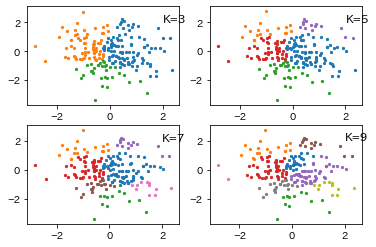

In [123]:
K=[2,4,6,8] #クラスタ数が3,5,7,9
for i in range(4):
    grp=cluster[K[i]]  #全体の結果から, クラスタ数がK[i]のときの結果を取り出す
    plt.subplot(2,2,i+1)
    for k in range(len(grp)):
        x=X[grp[k],0]
        y=X[grp[k],1]
        plt.scatter(x,y,s=5)
    plt.text(2,2,"K={}".format(K[i]+1),fontsize=12)

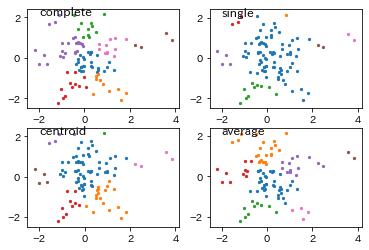

In [124]:
n=100;p=2;K=7
X=randn(n,p)
i=1
for d in ["complete","single","centroid","average"]:
    cluster=hc(X,dd=d)
    plt.subplot(2,2,i)
    i=i+1
    grp=cluster[K-1]
    for k in range(K):
        x=X[grp[k],0]
        y=X[grp[k],1]
        plt.scatter(x,y,s=5)
    plt.text(-2,2.1,"{}".format(d),fontsize=12)

### 樹形図のプログラム(付録)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import matplotlib.cm as cm

In [125]:
def unlist(x):
    y = []
    for z in x:
        y.extend(z)
    return(y)

In [250]:
def hc_dendroidgram(cluster,dd="complete",col="black"):
    y=unlist(cluster[0])
    n=len(y)
    z=np.zeros([n,5])
    index=[[y[i]] for i in range(n)]
    height=np.zeros(n)
    for k in range(n-1,0,-1):
        dist_min=np.inf
        for i in range(k):
            i_0=index[i];j_0=index[i+1]
            if dd == "complete":
                d=dist_complete(X[i_0,],X[j_0,])
            elif dd == "single":
                d=dist_single(X[i_0,],X[j_0,])
            elif dd == "centroid":
                d=dist_centroid(X[i_0,],X[j_0,])
            elif dd == "average":
                d=dist_average(X[i_0,],X[j_0,])
            if d<dist_min:
                dist_min=d
                i_1=i    #結合される側のlistのindex
                j_1=i+1    #新たに結合するlistのindex
        # ここから下で、線分の位置を計算する
        i=0
        for h in range(i_1):
            i=i+len(index[h])
        z[k,0]=i+len(index[i_1])/2
        z[k,1]=i+len(index[i_1])+len(index[j_1])/2
        z[k,2]=height[i_1]
        z[k,3]=height[j_1]
        z[k,4]=dist_min
        index[i_1].extend(index[j_1])
        if j_1 < k:               #追加したindexの後ろを1つ前に詰める
            for h in range(j_1,k):
                index[h]=index[h+1]
                height[h]=height[h+1]
        height[i_1]=dist_min
        height[k]=0
         # ループはここまで
    lines =  [[(z[k,0], z[k,4]), (z[k,0], z[k,2])] for k in range(1,n)] # 垂直線分 (左)
    lines2 = [[(z[k,0], z[k,4]), (z[k,1], z[k,4])] for k in range(1,n)] # 水平線分 (中央)
    lines3 = [[(z[k,1], z[k,4]), (z[k,1], z[k,3])] for k in range(1,n)] # 垂直線分 (右)
    lines.extend(lines2)
    lines.extend(lines3)
    lc = mc.LineCollection(lines, colors=col, linewidths=1) 
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot()
    ax.add_collection(lc)
    ax.autoscale()
    plt.show()
    fig = plt.figure(figsize=(4,4))

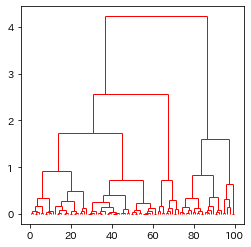

<Figure size 288x288 with 0 Axes>

In [255]:
n=100;p=1;
X=randn(n,p)
cluster=hc(X,dd="complete")
hc_dendroidgram(cluster,col="red")

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [22]:
X=randn(20,2)

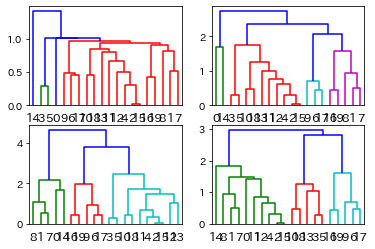

In [64]:
i=1
for d in ["single","average","complete","weighted"]:
    res_hc=linkage(X,method=d)
    plt.subplot(2,2,i)
    i+=1
    dendrogram(res_hc)

## 9.3 主成分分析

In [256]:
def pca(X):
    n,p=X.shape
    center=np.average(X,0)
    X=X-center #列ごとに中心化
    Sigma=X.T@X
    lam,phi= np.linalg.eig(Sigma)  #固有値, 固有ベクトル
    index = np.argsort(-lam)  #降順にソート
    lam = lam[index]
    phi = phi[:,index]
    return {'lam':lam,'vectors':phi,'centers':center}

In [257]:
X=randn(100,5)

In [258]:
res=pca(X)

In [259]:
res['lam']  

array([144.63933362, 106.96126951,  97.38027346,  87.01224977,
        72.92332632])

In [260]:
res['lam']/np.sum(res['lam'])  #各主成分の寄与率, 下のevrと同じ

array([0.28421037, 0.21017452, 0.19134825, 0.17097551, 0.14329135])

In [86]:
res['vectors']

array([[ 0.1904871 ,  0.86655739,  0.23631724,  0.34643019, -0.19218023],
       [ 0.65407668,  0.09134685, -0.59040129, -0.35265467, -0.30149701],
       [-0.13324667, -0.20604928, -0.50496326,  0.78034922, -0.27542008],
       [-0.5430764 ,  0.44470055, -0.57750325, -0.22518257,  0.35084505],
       [ 0.47245286, -0.02278504, -0.08415809,  0.30978817,  0.82049853]])

In [261]:
res['centers']

array([-0.11712794,  0.09999591, -0.07219018, -0.06607286,  0.06645762])

In [262]:
from sklearn.decomposition import PCA

In [263]:
pca=PCA()
pca.fit(X) #実行

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [264]:
score=pca.fit_transform(X) #主成分得点(行:n 列:主成分)
score[0:5,]

array([[ 0.53130308, -0.92450558,  0.24287058,  1.77012249, -1.29662826],
       [ 0.15299084,  1.23451264,  0.221556  ,  1.9395017 ,  0.50022729],
       [-0.65272773, -1.23915133,  0.61081856,  0.42827955,  1.12986475],
       [-0.01816701, -1.07653302, -1.38000587,  1.11955559,  0.47854347],
       [-0.9675721 , -0.65369017, -0.23334477, -0.91083679,  0.4134777 ]])

In [265]:
pca.components_ #上のvectoresの転置(+,-の反対は区別しない), 主成分負荷量 (行:主成分, 列:変数)

array([[ 0.56301655,  0.11826688, -0.54153431, -0.37556328,  0.48447717],
       [-0.14448111, -0.09832869, -0.18841497, -0.7546537 , -0.60370048],
       [-0.3769409 ,  0.32828787, -0.75569989,  0.37496113, -0.19612359],
       [-0.16151279,  0.89310034,  0.31051631, -0.2570008 ,  0.11753981],
       [-0.70282769, -0.26635177, -0.06113665, -0.28775816,  0.59037914]])

In [93]:
pca.mean_    #上のcentersと同じ

array([-0.03670141,  0.03260174,  0.13786866,  0.00316844, -0.12808206])

In [266]:
evr=pca.explained_variance_ratio_  #各主成分が全体のどれだけ説明しているか
evr

array([0.28421037, 0.21017452, 0.19134825, 0.17097551, 0.14329135])

Text(0, 0.5, '寄与率')

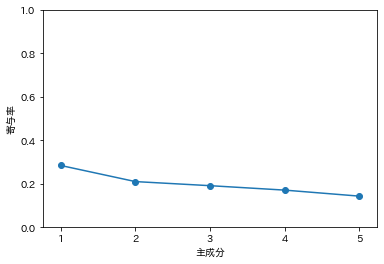

In [267]:
plt.plot(np.arange(1,6),evr)
plt.scatter(np.arange(1,6),evr)
plt.xticks(np.arange(1,6))
plt.ylim(0,1)
plt.xlabel("主成分")
plt.ylabel("寄与率")

Text(0, 0.5, '累積寄与率')

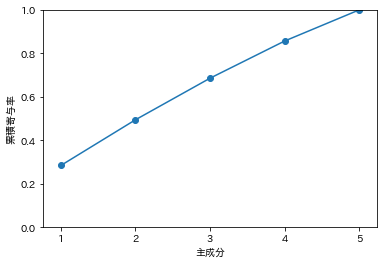

In [268]:
plt.plot(np.arange(1,6),np.cumsum(evr))
plt.scatter(np.arange(1,6),np.cumsum(evr))
plt.xticks(np.arange(1,6))
plt.ylim(0,1)
plt.xlabel("主成分")
plt.ylabel("累積寄与率")

(-4, 4)

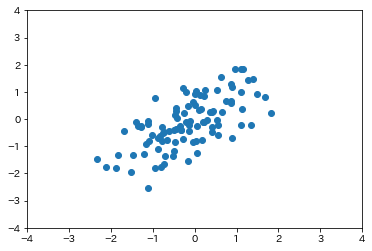

In [269]:
n=100;a=0.7
b=np.sqrt(1-a**2)
u=randn(n);v=randn(n)
x=u
y=u*a+v*b
plt.scatter(x,y)
plt.xlim(-4,4)
plt.ylim(-4,4)

In [270]:
D=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),1)

In [271]:
pca.fit(D)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [272]:
T=pca.components_   
T[1,0]/T[0,0]*T[1,1]/T[0,1]   #主成分ベクトル(主成分負荷量)が直交している

-0.9999999999999999

In [273]:
def f_1(x):
    y=T[1,0]/T[0,0]*x
    return y
def f_2(x):
    y=T[1,1]/T[0,1]*x
    return y

In [274]:
x_seq=np.arange(-4,4,0.5)

(-4.375, 3.875, -4.172520956411195, 4.710910757238446)

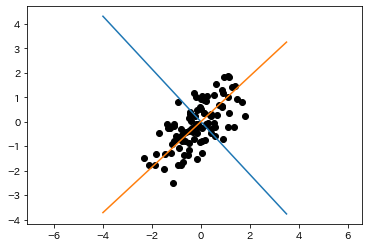

In [275]:
plt.scatter(x,y,c="black")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot(x_seq,f_1(x_seq))
plt.plot(x_seq,f_2(x_seq))
plt.axis('equal')

In [108]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [279]:
import pandas as pd
USA=pd.read_csv('USArrests.csv',header=0,index_col=0)
X=(USA-np.average(USA,0))/np.std(USA,0)
index=USA.index
col=USA.columns

In [280]:
pca=PCA(n_components=2)
pca.fit(X)
score=pca.fit_transform(X)
vector=pca.components_
vector

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [281]:
vector.shape[1]

4

In [282]:
evr=pca.explained_variance_ratio_  
evr

array([0.62006039, 0.24744129])

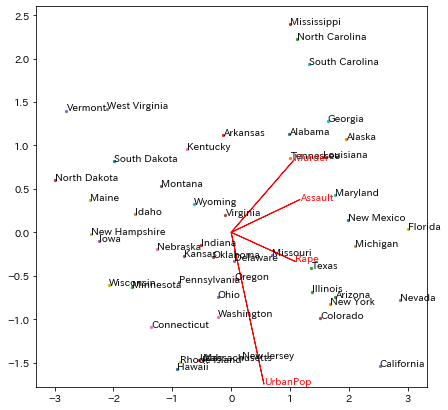

In [283]:
plt.figure(figsize=(7, 7))
for i in range(score.shape[0]):
    plt.scatter(score[i,0], score[i,1],s=5)
    plt.annotate(index[i], xy=(score[i,0], score[i,1]))
for j in range(vector.shape[1]):
    plt.arrow(0,0,vector[0,j]*2,vector[1,j]*2,color="red")  #2は線の長さ, 任意でよい
    plt.text(vector[0,j]*2,vector[1,j]*2,col[j],color="red")

In [284]:
from sklearn.datasets import load_boston
Boston=load_boston()

In [285]:
Z=np.concatenate((Boston.data,Boston.target.reshape(-1,1)),1)

In [286]:
from sklearn.cluster import KMeans
K_means=KMeans(n_clusters=5)
K_means.fit(Z)
y=K_means.fit_predict(Z)  #どこのクラスタか

In [288]:
pca.fit(Z)
W=pca.fit_transform(Z)[:,[0,1]] #各nに対する第１，第２主成分

Text(0.5, 1.0, 'Bostonデータのクラスタリング')

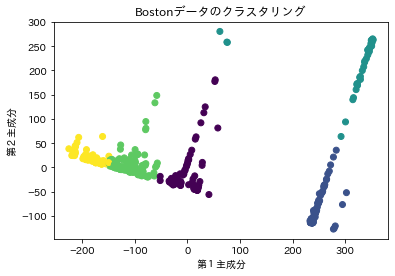

In [289]:
plt.scatter(W[:,0],W[:,1],c=y)
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("Bostonデータのクラスタリング")

In [290]:
def pca_regression(X,y,m):
    pca=PCA(n_components=m)
    pca.fit(X)
    Z=pca.fit_transform(X)  #行:n 列: 主成分
    phi=pca.components_  #行: 主成分 列:変数
    theta=np.linalg.inv(Z.T@Z)@Z.T@y
    beta=phi.T@theta
    return {'theta':theta, 'beta':beta}

In [291]:
n=100;p=5
X=randn(n,p)
X=X-np.average(X,0)

In [292]:
y=X[:,0]+X[:,1]+X[:,2]+X[:,3]+X[:,4]+randn(n)
y=y-np.mean(y)

In [293]:
pca_regression(X,y,3)

{'theta': array([ 1.14800075,  1.55417423, -0.87144561]),
 'beta': array([0.65044811, 0.72251212, 0.82285971, 1.56657006, 0.64531722])}

In [294]:
pca_regression(X,y,5)['beta']

array([0.87779437, 1.02005528, 1.14112225, 0.97636176, 1.10999064])

In [125]:
np.linalg.inv(X.T@X)@X.T@y

array([0.86513279, 1.01698307, 0.7496746 , 0.91010065, 1.12420093])